# SQL Window Functions for Northwind Traders

## Getting to Know the Data

In [1]:
# Install the 'ipython-sql' and 'psycopg2' packages
# Package enable writing SQL directly in the Notebook
# !pip install ipython-sql
# !pip install psycopg2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [3]:
# Load the 'sql' extension for IPython
%load_ext sql

In [4]:
# Update config to get rid of "KeyError: 'DEFAULT'" error when running queries
%config SqlMagic.style = '_DEPRECATED_DEFAULT'

In [5]:
# Function to load result of an sql query to a DataFrame
def create_df(query):
    result = %sql $query
    df = result.DataFrame()
    return df

In [6]:
# Connect to the northwind database
%sql postgresql://postgres@localhost:5432/northwind

In [7]:
%%sql
SELECT table_name AS name,
       table_type AS type
FROM information_schema.tables
WHERE table_schema = 'public' AND table_type IN ('BASE TABLE', 'VIEW');

 * postgresql://postgres@localhost:5432/northwind
14 rows affected.


name,type
territories,BASE TABLE
order_details,BASE TABLE
employee_territories,BASE TABLE
us_states,BASE TABLE
customers,BASE TABLE
orders,BASE TABLE
employees,BASE TABLE
shippers,BASE TABLE
products,BASE TABLE
categories,BASE TABLE


In [8]:
%%sql
SELECT * FROM orders LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
5 rows affected.


order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.3,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium


In [9]:
%%sql
SELECT * FROM customers LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
5 rows affected.


customer_id,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,None,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,None,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,None,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,None,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,None,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [10]:
%%sql
SELECT *
  FROM orders o
  LEFT JOIN customers c
    ON o.customer_id = c.customer_id
 LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
5 rows affected.


order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country,customer_id_1,company_name,contact_name,contact_title,address,city,region,postal_code,country,phone,fax
10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,VINET,Vins et alcools Chevalier,Paul Henriot,Accounting Manager,59 rue de l'Abbaye,Reims,None,51100,France,26.47.15.10,26.47.15.11
10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,TOMSP,Toms Spezialitäten,Karin Josephs,Marketing Manager,Luisenstr. 48,Münster,None,44087,Germany,0251-031259,0251-035695
10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,HANAR,Hanari Carnes,Mario Pontes,Accounting Manager,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,(21) 555-0091,(21) 555-8765
10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France,VICTE,Victuailles en stock,Mary Saveley,Sales Agent,"2, rue du Commerce",Lyon,None,69004,France,78.32.54.86,78.32.54.87
10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.3,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium,SUPRD,Suprêmes délices,Pascale Cartrain,Accounting Manager,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium,(071) 23 67 22 20,(071) 23 67 22 21


In [11]:
%%sql
SELECT * FROM order_details LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
5 rows affected.


order_id,product_id,unit_price,quantity,discount
10248,11,14.0,12,0.0
10248,42,9.8,10,0.0
10248,72,34.8,5,0.0
10249,14,18.6,9,0.0
10249,51,42.4,40,0.0


In [12]:
%%sql
SELECT employee_id, last_name, first_name, reports_to
  FROM employees
 LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
5 rows affected.


employee_id,last_name,first_name,reports_to
1,Davolio,Nancy,2
2,Fuller,Andrew,None
3,Leverling,Janet,2
4,Peacock,Margaret,2
5,Buchanan,Steven,2


## Ranking Employee Sales Performance

### Review the company's sales performance from an employee perspective

* To recogninise and reward top performing employees to foster a culture of excellence
* To identify struggling employees with a view to offering training and resources to help them improve

Rank employees based on their total sales amount...

In [13]:
%%sql
  WITH employee_sales AS (
SELECT e.employee_id, e.last_name, e.first_name,
       ROUND(SUM((od.unit_price * od.quantity) - discount)::numeric, 2) AS total_sales
  FROM employees e
  LEFT JOIN orders o
    ON e.employee_id = o.employee_id
  LEFT JOIN order_details od
    ON o.order_id = od.order_id
 GROUP BY e.employee_id, e.last_name, e.first_name
)
SELECT *, RANK() OVER(ORDER BY total_sales DESC) AS sales_rank
  FROM employee_sales;

 * postgresql://postgres@localhost:5432/northwind
9 rows affected.


employee_id,last_name,first_name,total_sales,sales_rank
4,Peacock,Margaret,250161.70,1
3,Leverling,Janet,213035.35,2
1,Davolio,Nancy,202126.72,3
2,Fuller,Andrew,177738.71,4
7,King,Robert,141283.04,5
8,Callahan,Laura,133286.43,6
9,Dodsworth,Anne,82956.70,7
6,Suyama,Michael,78188.95,8
5,Buchanan,Steven,75559.95,9


Margaret Peacock has the best total sales amount of 250,161.70.

Steven Buchanan has the lowest total sales amount of 75,559.95

## Running Total of Monthly Sales

### Visualise the company's sales progress over time on a monthly basis

Aggregate sales data at a monthly level and calculate the running total of sales by month...

In [14]:
%%sql
SELECT * FROM orders LIMIT 5;

 * postgresql://postgres@localhost:5432/northwind
5 rows affected.


order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.3,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium


In [15]:
%%sql
SELECT MIN(order_date) AS first_order_date, MAX(order_date) AS last_order_date
  FROM orders;

 * postgresql://postgres@localhost:5432/northwind
1 rows affected.


first_order_date,last_order_date
1996-07-04,1998-05-06


In [16]:
%%sql
  WITH monthly_sales AS (
SELECT TO_CHAR(DATE_TRUNC('month', o.order_date), 'YYYY-MM') AS month,
       ROUND(SUM((od.unit_price * od.quantity) - od.discount)::numeric, 2) AS monthly_sales
  FROM orders o
  LEFT JOIN order_details od
    ON o.order_id = od.order_id
 GROUP BY month
 ORDER BY month
)
SELECT month, monthly_sales,
       SUM(monthly_sales) OVER (ORDER BY month
                                ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS cumulative_monthly_sales
  FROM monthly_sales;

 * postgresql://postgres@localhost:5432/northwind
23 rows affected.


month,monthly_sales,cumulative_monthly_sales
1996-07,30188.40,30188.40
1996-08,26606.70,56795.10
1996-09,27634.60,84429.70
1996-10,41198.80,125628.50
1996-11,49701.10,175329.60
1996-12,50947.40,226277.00
1997-01,66687.25,292964.25
1997-02,41201.65,334165.90
1997-03,39976.25,374142.15
1997-04,55695.24,429837.39


In [17]:
query = """
WITH monthly_sales AS (
SELECT TO_CHAR(DATE_TRUNC('month', o.order_date), 'YYYY-MM') AS month,
       ROUND(SUM((od.unit_price * od.quantity) - od.discount)::numeric, 2) AS monthly_sales
  FROM orders o
  LEFT JOIN order_details od
    ON o.order_id = od.order_id
 GROUP BY month
 ORDER BY month
)
SELECT month, monthly_sales,
       SUM(monthly_sales) OVER (ORDER BY month
                                ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS cumulative_monthly_sales
  FROM monthly_sales;
"""
monthly_sales_df = create_df(query)
monthly_sales_df

 * postgresql://postgres@localhost:5432/northwind
23 rows affected.


,month,monthly_sales,cumulative_monthly_sales
0,1996-07,30188.40,30188.40
1,1996-08,26606.70,56795.10
2,1996-09,27634.60,84429.70
3,1996-10,41198.80,125628.50
4,1996-11,49701.10,175329.60
5,1996-12,50947.40,226277.00
6,1997-01,66687.25,292964.25
7,1997-02,41201.65,334165.90
8,1997-03,39976.25,374142.15
9,1997-04,55695.24,429837.39


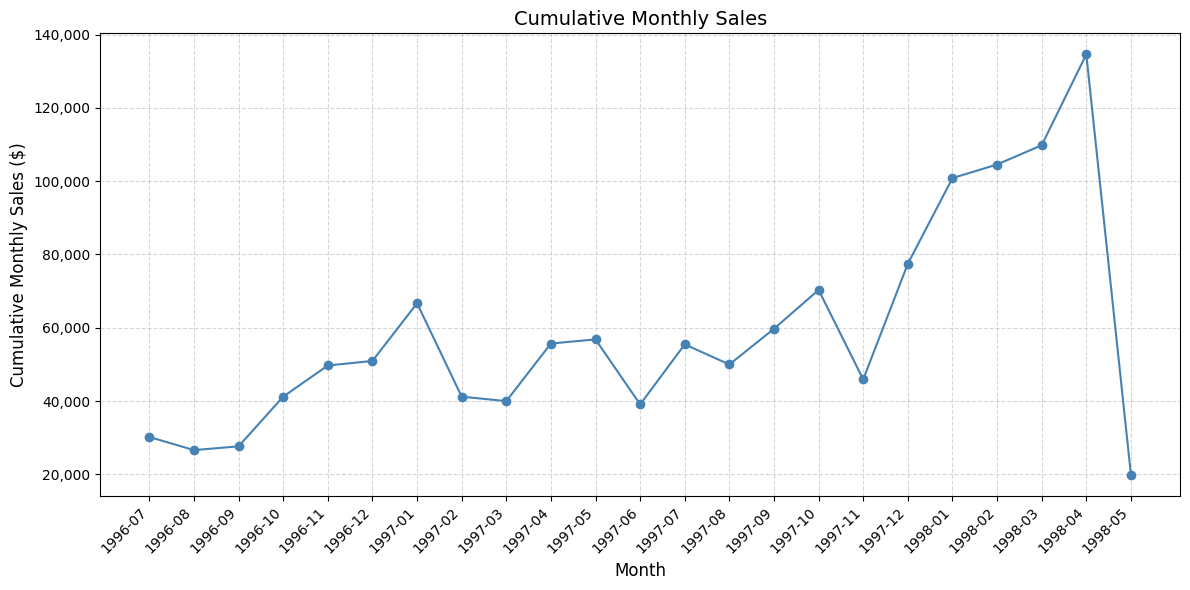

In [18]:
# Visualise the monthly sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_df['month'],
         monthly_sales_df['monthly_sales'],
         marker='o',
         color='steelblue')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cumulative Monthly Sales ($)', fontsize=12)
plt.title('Cumulative Monthly Sales', fontsize=14)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show();

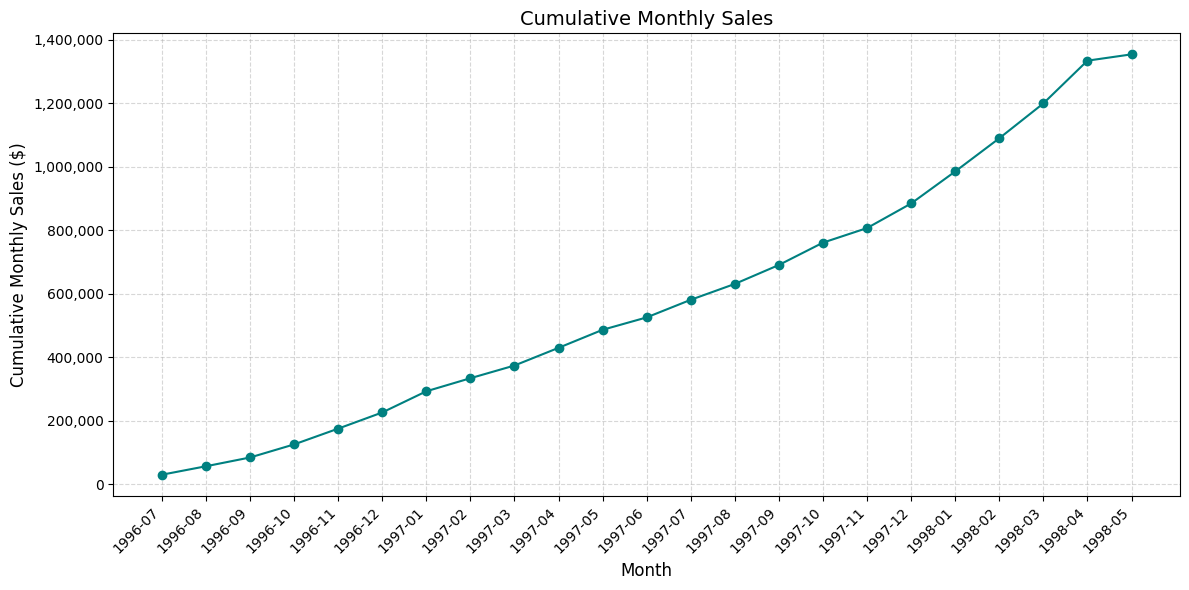

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_df['month'],
         monthly_sales_df['cumulative_monthly_sales'],
         marker='o',
         color='teal')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cumulative Monthly Sales ($)', fontsize=12)
plt.title('Cumulative Monthly Sales', fontsize=14)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show();

Monthly sales have generally risen with some peaks and troughs until late 1997 when there was a sharp upturn. The low amount for the last month in the dataset indicates that it might be an incomplete month.

## Month Over Month Sales Growth

Calculate the percentage change in sales month by month.

In [20]:
%%sql
  WITH monthly_sales AS (
SELECT TO_CHAR(DATE_TRUNC('month', o.order_date), 'YYYY-MM') AS month,
       ROUND(SUM((od.unit_price * od.quantity) - od.discount)::numeric, 2) AS monthly_sales
  FROM orders o
  LEFT JOIN order_details od
    ON o.order_id = od.order_id
 GROUP BY month
 ORDER BY month
),
       prev_monthly_sales AS (
SELECT month, LAG(monthly_sales, 1, 0.0) OVER () AS prev_month_sales
  FROM monthly_sales
  )
SELECT m.month, m.monthly_sales, p.prev_month_sales,
       ROUND(100 * (m.monthly_sales - p.prev_month_sales) / NULLIF(p.prev_month_sales,0), 2) AS pct_change
  FROM monthly_sales m
  JOIN prev_monthly_sales p
    ON m.month = p.month;

 * postgresql://postgres@localhost:5432/northwind
23 rows affected.


month,monthly_sales,prev_month_sales,pct_change
1996-07,30188.40,0.0,None
1996-08,26606.70,30188.40,-11.86
1996-09,27634.60,26606.70,3.86
1996-10,41198.80,27634.60,49.08
1996-11,49701.10,41198.80,20.64
1996-12,50947.40,49701.10,2.51
1997-01,66687.25,50947.40,30.89
1997-02,41201.65,66687.25,-38.22
1997-03,39976.25,41201.65,-2.97
1997-04,55695.24,39976.25,39.32


The biggest drop was May 1998 which, as mentioned previously could be down to an incomplete month of data. The next biggest drop was February 1997. The biggest growth month on month was recorded in December 1997 with nearly 70% on the previous month.

## Identifying High Value Customers

Identify customers with order values that are above average.

In [21]:
%%sql
  WITH customer_sales AS (
SELECT o.customer_id,(od.unit_price * od.quantity) - od.discount AS sales_amount,
       AVG((od.unit_price * od.quantity) - od.discount) OVER () AS avg_sales_amount
  FROM orders o
  LEFT JOIN order_details od
    ON o.order_id = od.order_id
  LEFT JOIN customers c
    ON o.customer_id = c.customer_id
)
SELECT customer_id, sales_amount,
       CASE
       WHEN sales_amount > avg_sales_amount THEN 'Above Average'
       ELSE 'Average/Below Average' END AS high_value
  FROM customer_sales
;

 * postgresql://postgres@localhost:5432/northwind
2155 rows affected.


customer_id,sales_amount,high_value
VINET,168.0,Average/Below Average
VINET,98.00000190734863,Average/Below Average
VINET,173.99999618530273,Average/Below Average
TOMSP,167.40000343322754,Average/Below Average
TOMSP,1696.0000610351562,Above Average
HANAR,76.99999809265137,Average/Below Average
HANAR,1483.8500533998013,Above Average
HANAR,251.84998854994774,Average/Below Average
VICTE,100.74999542161822,Average/Below Average
VICTE,233.95000572130084,Average/Below Average


In [22]:
%%sql
  WITH customer_sales AS (
SELECT o.customer_id,(od.unit_price * od.quantity) - od.discount AS sales_amount,
       AVG((od.unit_price * od.quantity) - od.discount) OVER () AS avg_sales_amount
  FROM orders o
  LEFT JOIN order_details od
    ON o.order_id = od.order_id
  LEFT JOIN customers c
    ON o.customer_id = c.customer_id
)
SELECT customer_id, number_of_orders
  FROM (SELECT customer_id,
               CASE WHEN sales_amount > avg_sales_amount THEN 'Above Average'
               ELSE 'Average/Below Average' END AS high_value,
               COUNT(*) AS number_of_orders
          FROM customer_sales
         GROUP BY customer_id, high_value) h
 WHERE high_value = 'Above Average'
 ORDER BY number_of_orders DESC;

 * postgresql://postgres@localhost:5432/northwind
73 rows affected.


customer_id,number_of_orders
SAVEA,60
QUICK,54
ERNSH,52
HUNGO,25
RATTC,18
HILAA,16
FRANK,16
FOLKO,16
KOENE,16
BOTTM,15


## Percentage of Sales for Each Category

To help guide decisions about inventory, calculate the percentage of total sales for each product category.

In [23]:
%%sql
  WITH category_sales AS (
SELECT c.category_name,
       ROUND(SUM((od.unit_price * od.quantity) - od.discount)::numeric, 2) AS category_sales
  FROM categories c
  LEFT JOIN products p
    ON c.category_id = p.category_id
  LEFT JOIN order_details od
    ON p.product_id = od.product_id
 GROUP BY c.category_name
)
SELECT category_name, category_sales,
       ROUND(100 * category_sales / SUM(category_sales) OVER (), 2) AS pct_of_total_sales
  FROM category_sales
 ORDER BY pct_of_total_sales DESC;

 * postgresql://postgres@localhost:5432/northwind
8 rows affected.


category_name,category_sales,pct_of_total_sales
Beverages,286501.95,21.15
Dairy Products,251310.94,18.56
Meat/Poultry,178177.65,13.16
Confections,177080.08,13.08
Seafood,141603.21,10.46
Condiments,113683.38,8.39
Produce,105262.42,7.77
Grains/Cereals,100717.92,7.44


The product category with the highest share of total sales is Beverages (21.2%) with Grains/Cereals the lowest (7.4%)

## Top Products per Category

In [24]:
%%sql
  WITH product_sales AS (
SELECT c.category_name, p.product_name,
       ROUND(SUM((od.unit_price * od.quantity) - od.discount)::numeric, 2) AS product_sales
  FROM categories c
  LEFT JOIN products p
    ON c.category_id = p.category_id
  LEFT JOIN order_details od
    ON p.product_id = od.product_id
 GROUP BY c.category_name, p.product_name
)
SELECT *
  FROM (SELECT ROW_NUMBER() OVER (PARTITION BY category_name ORDER BY product_sales DESC) AS row_num,
               category_name, product_name, product_sales
          FROM product_sales) s
 WHERE row_num <= 3;

 * postgresql://postgres@localhost:5432/northwind
24 rows affected.


row_num,category_name,product_name,product_sales
1,Beverages,Côte de Blaye,149983.10
2,Beverages,Ipoh Coffee,25077.80
3,Beverages,Chang,18554.70
1,Condiments,Vegie-spread,17695.60
2,Condiments,Sirop d'érable,16437.10
3,Condiments,Louisiana Fiery Hot Pepper Sauce,14605.45
1,Confections,Tarte au sucre,49825.30
2,Confections,Sir Rodney's Marmalade,23635.06
3,Confections,Gumbär Gummibärchen,21533.25
1,Dairy Products,Raclette Courdavault,76293.45


The top performing product in the top performing category (Beverages) is Côte de Blaye with 149,983.10 total sales in the period analysed.